# 1. Importing All Required Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading the data

In [135]:
deliveries=pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [136]:
df=pd.concat([matches,deliveries])

In [27]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [28]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [29]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [30]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [31]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [32]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179834 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                756 non-null     float64
 1   season            756 non-null     float64
 2   city              749 non-null     object 
 3   date              756 non-null     object 
 4   team1             756 non-null     object 
 5   team2             756 non-null     object 
 6   toss_winner       756 non-null     object 
 7   toss_decision     756 non-null     object 
 8   result            756 non-null     object 
 9   dl_applied        756 non-null     float64
 10  winner            752 non-null     object 
 11  win_by_runs       756 non-null     float64
 12  win_by_wickets    756 non-null     float64
 13  player_of_match   752 non-null     object 
 14  venue             756 non-null     object 
 15  umpire1           754 non-null     object 
 16  umpire2           754 non

In [34]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,756.000000,756.000000,756.000000,756.000000,756.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3464.478148,3.366895,0.156630,23.471144,3.387963,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [35]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# 3. Cleaning the Data



In [36]:
df.isnull().sum()

id                  179078
season              179078
city                179085
date                179078
team1               179078
team2               179078
toss_winner         179078
toss_decision       179078
result              179078
dl_applied          179078
winner              179082
win_by_runs         179078
win_by_wickets      179078
player_of_match     179082
venue               179078
umpire1             179080
umpire2             179080
umpire3             179715
match_id               756
inning                 756
batting_team           756
bowling_team           756
over                   756
ball                   756
batsman                756
non_striker            756
bowler                 756
is_super_over          756
wide_runs              756
bye_runs               756
legbye_runs            756
noball_runs            756
penalty_runs           756
batsman_runs           756
extra_runs             756
total_runs             756
player_dismissed    171000
d

In [37]:
# Removing duplicates from matches dataset
matches_cleaned = matches.drop_duplicates()

# Confirming no duplicates exist
print(f"Duplicates in Matches Dataset: {matches_cleaned.duplicated().sum()}")


Duplicates in Matches Dataset: 0


In [38]:
# Statistical summary
print("Statistical Information of the Match Dataset:")
matches_cleaned.describe()


Statistical Information of the Match Dataset:


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [40]:
# Removing duplicates from matches dataset
deleverd_cleaned = deliveries.drop_duplicates()

# Confirming no duplicates exist
print(f"Duplicates in Matches Dataset: {matches_cleaned.duplicated().sum()}")


Duplicates in Matches Dataset: 0


In [41]:
# Statistical summary
print("Statistical Information of the deleverd Dataset:")
deleverd_cleaned.describe()


Statistical Information of the deleverd Dataset:


,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# 4. Visualizing the Data

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\1348161753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.index, y=team_runs.values, palette='muted')


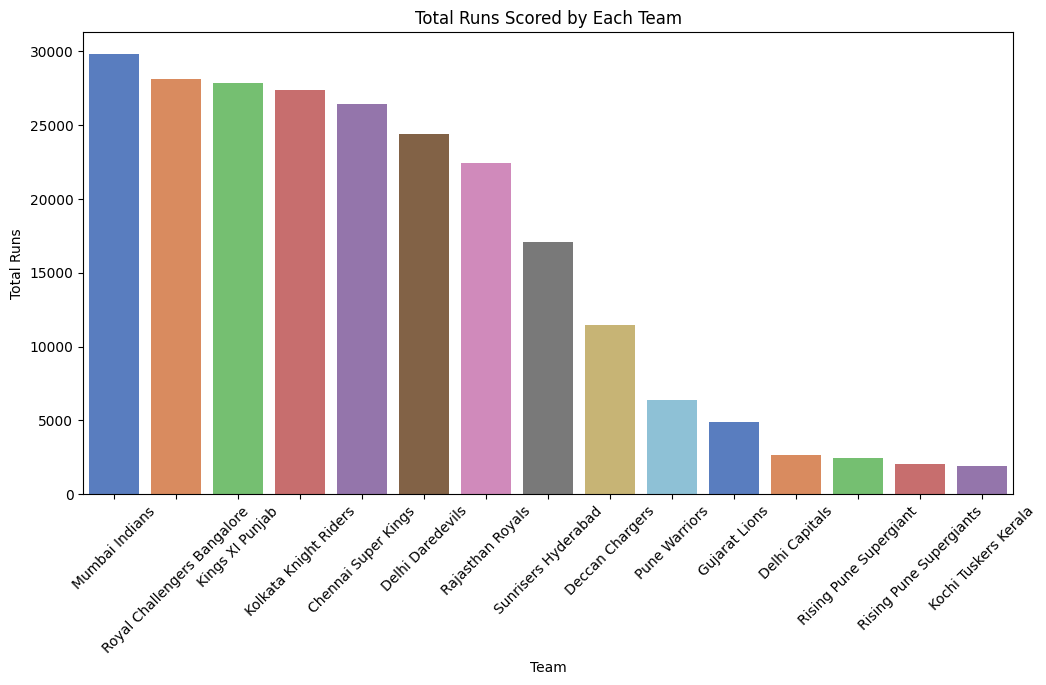

In [42]:
# Grouping by batting team to calculate total runs
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Plotting the total runs scored by each team
plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.index, y=team_runs.values, palette='muted')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()


# Total number of innings of the matches played

In [43]:
total_innings = df['inning'].nunique()
total_innings 

5

# How many IPL seasons are we using to analyse ? 

In [44]:
season = df['season'].nunique()
season

12

# Total number of matches played according to the dataset

In [45]:
total_matches = df['match_id'].nunique()
total_matches


756

# Which IPL team won by maximum runs?

In [75]:
# Find the team that won by maximum runs
max_runs_match = matches.loc[matches['win_by_runs'].idxmax()] # or max_runs_match = matches.loc[matches['win_by_runs'].argmax()]
max_runs_match

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [55]:
# Extract the team name and runs
team_max_runs = max_runs_match['winner']
max_runs = max_runs_match['win_by_runs']

team_max_runs, max_runs

('Mumbai Indians', 146)

# Which IPL team won by minimum runs ?

In [71]:
# Find the team that won by maximum runs
matches_with_runs = matches[matches['win_by_runs'] > 0]
min_runs_match = matches_with_runs.loc[matches_with_runs['win_by_runs'].idxmin()]
# Extract the team name and runs
team_min_runs = min_runs_match['winner']
min_runs = min_runs_match['win_by_runs']

team_min_runs, min_runs

('Mumbai Indians', 1)

# Which IPL team won by consuming maximum  wickets?

In [73]:
# Find the match with the maximum win by wickets
max_wickets_match = matches.loc[matches['win_by_wickets'].idxmax()]

# Extract the team name and the number of wickets
team_max_wickets = max_wickets_match['winner']
max_wickets = max_wickets_match['win_by_wickets']

team_max_wickets,max_wickets


('Kolkata Knight Riders', 10)

# Which IPL team won by consuming minimum wickets?

In [76]:
# Find the match with the maximum win by wickets
min_wickets_match = matches.loc[matches['win_by_wickets'].idxmin()]

# Extract the team name and the number of wickets
team_min_wickets = min_wickets_match['winner']
min_wickets = min_wickets_match['win_by_wickets']

team_min_wickets,min_wickets


('Sunrisers Hyderabad', 0)

# Questions based on Visualization  :

# Which season consisted of the highest number of matches ever played ?

In [78]:
# Group by season and count the number of matches in each season
matches_per_season = matches.groupby('season').size()

# Find the season with the maximum number of matches
max_matches_season = matches_per_season.idxmax()
max_matches = matches_per_season.max()

#The season with the highest number of matches played is 
max_matches_season,max_matches


(2013, 76)

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\146573961.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='coolwarm')


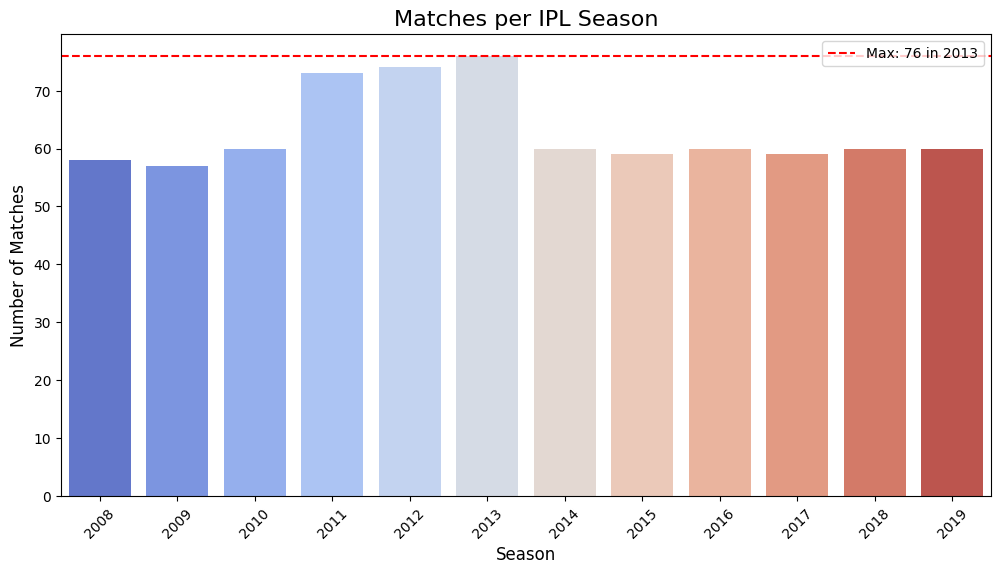

In [79]:
# Count matches per season
matches_per_season = matches.groupby('season').size()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values, palette='coolwarm')

# Title and labels
plt.title('Matches per IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)

# Highlight max matches season
max_season = matches_per_season.idxmax()
max_matches = matches_per_season.max()
plt.axhline(max_matches, color='red', linestyle='--', label=f'Max: {max_matches} in {max_season}')
plt.legend()

# Show plot
plt.show()

# Which is the most successful IPL team with all the data at hand?

In [80]:
# Group by winner and count the number of matches won by each team
team_wins = matches['winner'].value_counts()

# Find the team with the most wins
most_successful_team = team_wins.idxmax()
most_wins = team_wins.max()

#The most successful IPL team 
most_successful_team,most_wins


('Mumbai Indians', 109)

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\1963332123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')


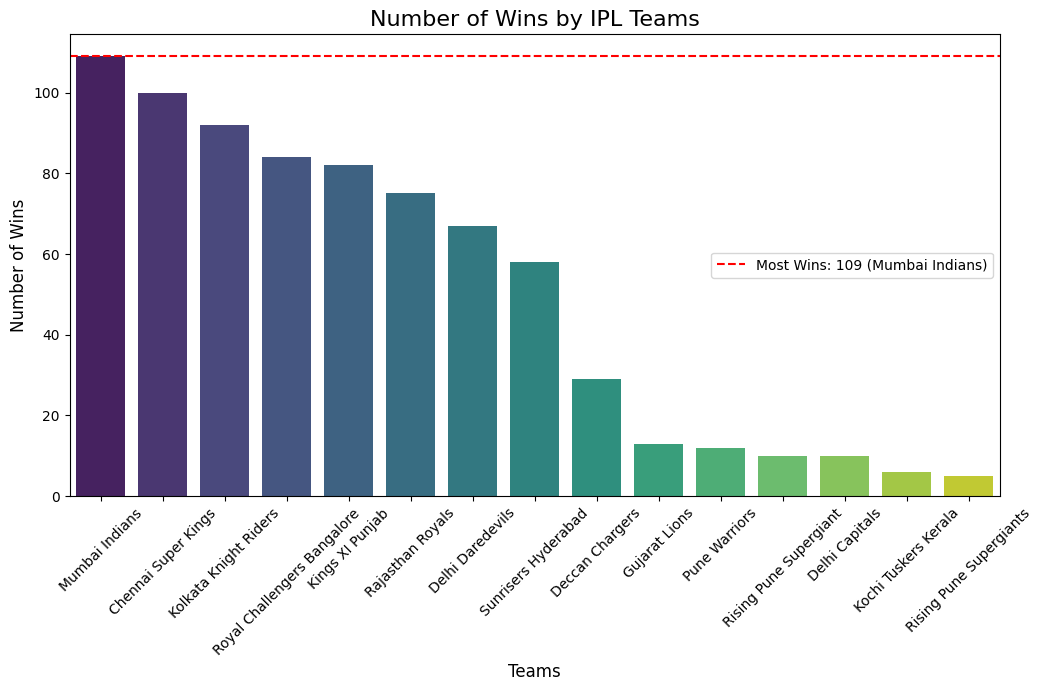

In [81]:
# Plot the number of wins for each team
plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')

# Add title and labels
plt.title('Number of Wins by IPL Teams', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=45)

# Highlight the most successful team
plt.axhline(most_wins, color='red', linestyle='--', label=f'Most Wins: {most_wins} ({most_successful_team})')
plt.legend()

# Display the plot
plt.show()

# Top players of winning matches

In [82]:
# Count the number of Player of the Match awards for each player
top_players = matches['player_of_match'].value_counts()

# Display the top 10 players
print("Top 10 Players by Player of the Match awards:")
print(top_players.head(10))

# Extract data for visualization
top_10_players = top_players.head(10)


Top 10 Players by Player of the Match awards:
player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3576065396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_players.values, y=top_10_players.index, palette='coolwarm')


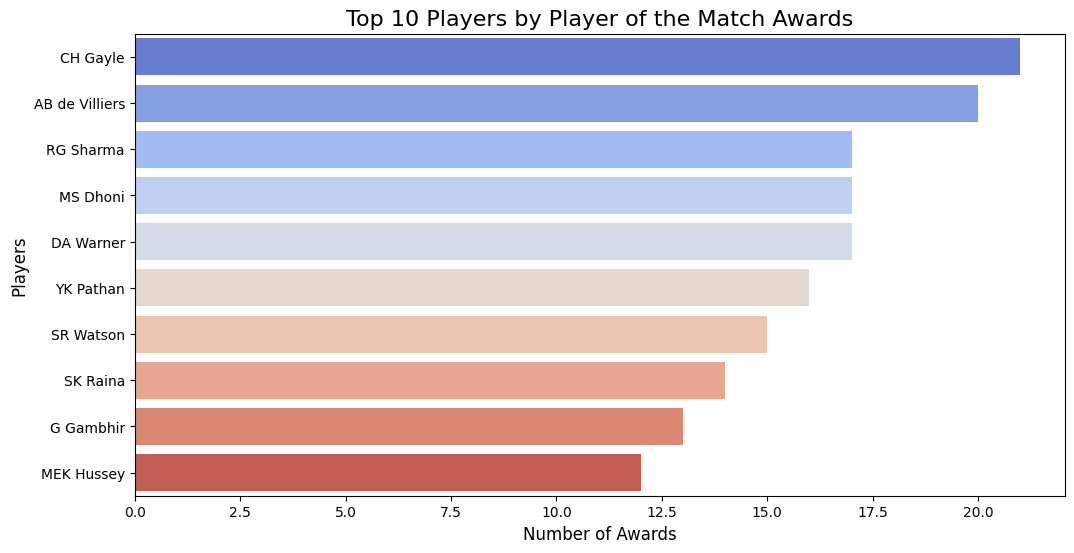

In [83]:
# Plot the top 10 players with the most Player of the Match awards
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_players.values, y=top_10_players.index, palette='coolwarm')

# Add title and labels
plt.title('Top 10 Players by Player of the Match Awards', fontsize=16)
plt.xlabel('Number of Awards', fontsize=12)
plt.ylabel('Players', fontsize=12)

# Display the plot
plt.show()

# Matches according to venue

In [84]:
# Group by venue and count the number of matches played at each venue
matches_per_venue = matches['venue'].value_counts()

# Display the top venues with the most matches
print("Top Venues by Number of Matches Played:")
print(matches_per_venue.head(10))


Top Venues by Number of Matches Played:
venue
Eden Gardens                                  77
M Chinnaswamy Stadium                         73
Wankhede Stadium                              73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3681582879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_venue.values, y=matches_per_venue.index, palette='Blues_d')


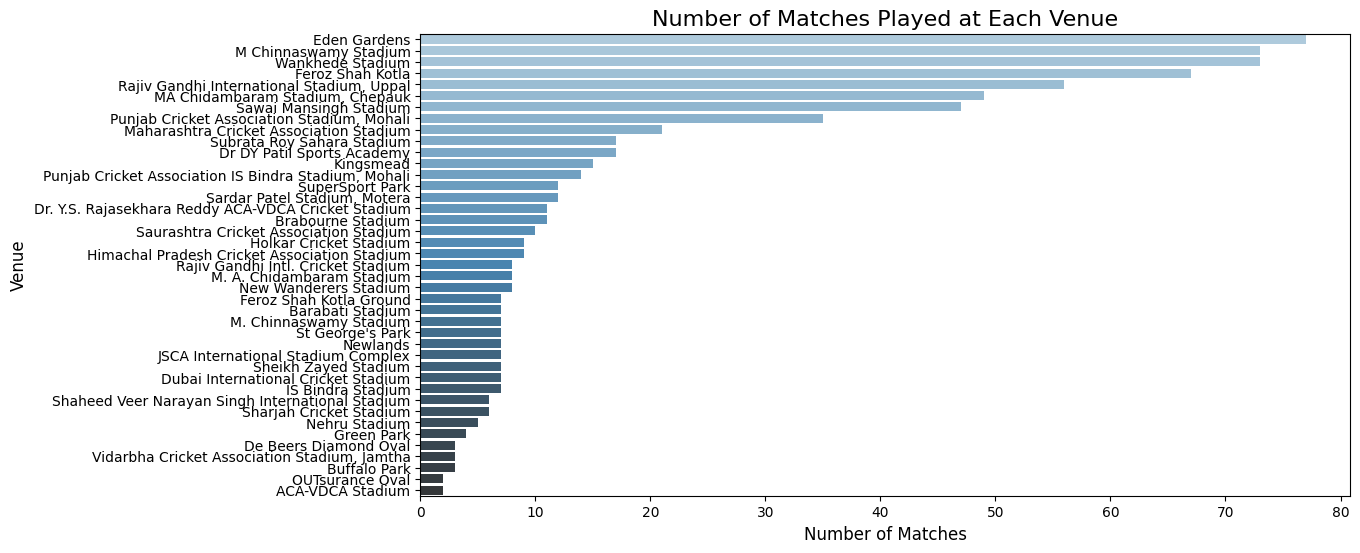

In [85]:
# Plot the number of matches played at each venue
plt.figure(figsize=(12, 6))
sns.barplot(x=matches_per_venue.values, y=matches_per_venue.index, palette='Blues_d')

# Add title and labels
plt.title('Number of Matches Played at Each Venue', fontsize=16)
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Venue', fontsize=12)

# Display the plot
plt.show()

# The number of matches played by each team

In [87]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [88]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [96]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [95]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [89]:
# Count the number of matches played by each team as either batting_team or bowling_team
matches_played_by_team = pd.concat([deliveries['batting_team'], deliveries['bowling_team']]).value_counts()

# Display the top 10 teams with the most matches played
print("Top Teams by Number of Matches Played:")
matches_played_by_team.head(10)


Top Teams by Number of Matches Played:


Mumbai Indians                 45136
Royal Challengers Bangalore    42144
Kolkata Knight Riders          41798
Kings XI Punjab                41713
Chennai Super Kings            39318
Delhi Daredevils               37511
Rajasthan Royals               34674
Sunrisers Hyderabad            25687
Deccan Chargers                18073
Pune Warriors                  10900
Name: count, dtype: int64

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\4138300664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_played_by_team.values, y=matches_played_by_team.index, palette='viridis')


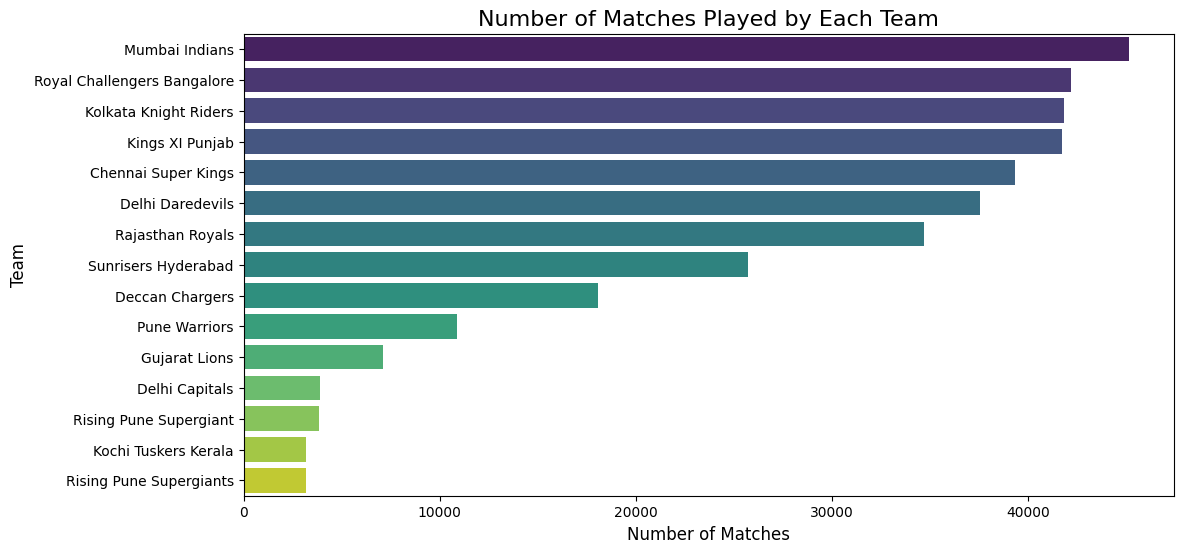

In [90]:
# Plot the number of matches played by each team
plt.figure(figsize=(12, 6))
sns.barplot(x=matches_played_by_team.values, y=matches_played_by_team.index, palette='viridis')

# Add title and labels
plt.title('Number of Matches Played by Each Team', fontsize=16)
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Team', fontsize=12)

# Display the plot
plt.show()

# The winners in each Season

In [91]:
# Group by season and get the winner for each season
season_winners = matches.groupby('season')['winner'].first()

# Display the winners of each season
print("Winners in Each IPL Season:")
print(season_winners)


Winners in Each IPL Season:
season
2008      Kolkata Knight Riders
2009             Mumbai Indians
2010      Kolkata Knight Riders
2011        Chennai Super Kings
2012             Mumbai Indians
2013      Kolkata Knight Riders
2014      Kolkata Knight Riders
2015      Kolkata Knight Riders
2016    Rising Pune Supergiants
2017        Sunrisers Hyderabad
2018        Chennai Super Kings
2019        Chennai Super Kings
Name: winner, dtype: object


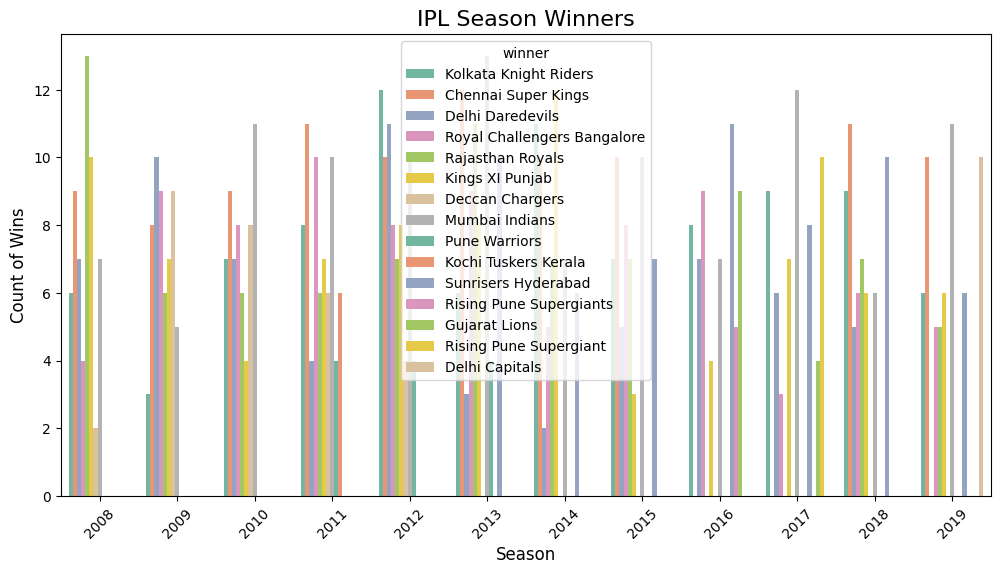

In [92]:
# Plot the winners in each season
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='winner', data=matches, palette='Set2')

# Add title and labels
plt.title('IPL Season Winners', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count of Wins', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# IPL Finals venues and winners along with the number of wins.

In [97]:
# Step 1: Identify the last match of each season (assumed to be the final match)
finals = matches.sort_values(by=['season', 'id']).drop_duplicates('season', keep='last')

# Step 2: Extract the venue and winner for each final match
finals_venue_winner = finals[['season', 'venue', 'winner']]

# Step 3: Count the number of wins in finals by each team
finals_wins = finals['winner'].value_counts()

# Display the venue, winner, and number of wins
print("IPL Finals Venue and Winners along with the number of Wins:")
print(finals_venue_winner)

print("\nNumber of Wins in IPL Finals:")
print(finals_wins)

IPL Finals Venue and Winners along with the number of Wins:
     season                                      venue                 winner
116    2008                 Dr DY Patil Sports Academy       Rajasthan Royals
173    2009                      New Wanderers Stadium        Deccan Chargers
233    2010                 Dr DY Patil Sports Academy    Chennai Super Kings
306    2011            MA Chidambaram Stadium, Chepauk    Chennai Super Kings
380    2012            MA Chidambaram Stadium, Chepauk  Kolkata Knight Riders
456    2013                               Eden Gardens         Mumbai Indians
516    2014                      M Chinnaswamy Stadium  Kolkata Knight Riders
575    2015                               Eden Gardens         Mumbai Indians
635    2016                      M Chinnaswamy Stadium    Sunrisers Hyderabad
58     2017  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians
695    2018                           Wankhede Stadium    Chennai Super Kings
755 

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3272971551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=finals_wins.index, y=finals_wins.values, palette='coolwarm')


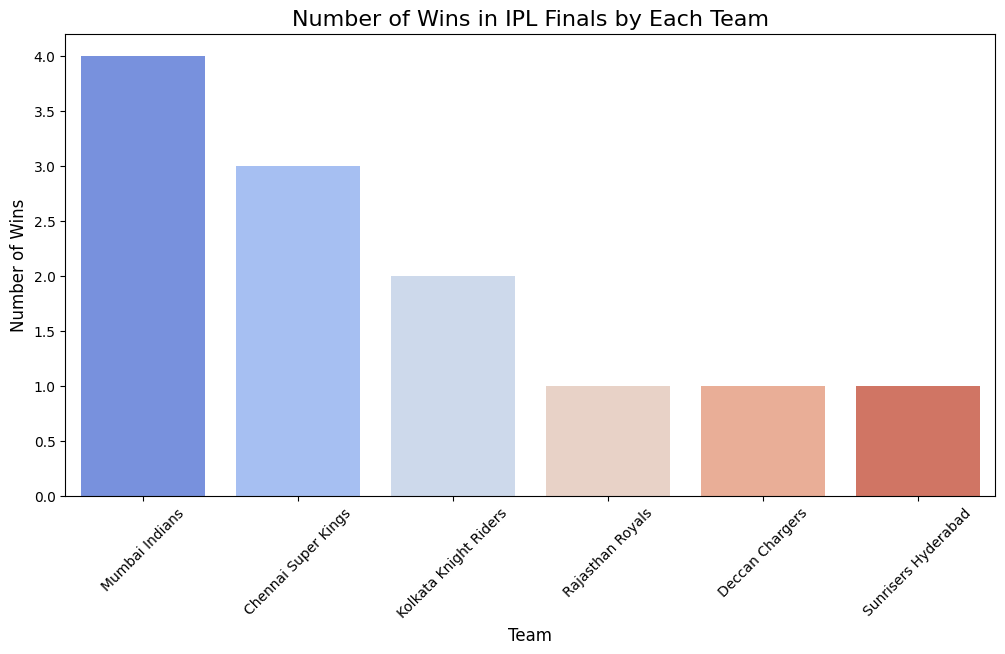

In [98]:
# Plot the number of finals won by each team
plt.figure(figsize=(12, 6))
sns.barplot(x=finals_wins.index, y=finals_wins.values, palette='coolwarm')

# Add title and labels
plt.title('Number of Wins in IPL Finals by Each Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# The number of seasons won by each team

In [99]:
# Step 1: Group the data by season and winner
season_winners = matches.groupby('season')['winner'].first()  # Get the winner for each season

# Step 2: Count the number of seasons won by each team
seasons_won = season_winners.value_counts()

# Display the number of seasons won by each team
print("Number of Seasons Won by Each Team:")
print(seasons_won)


Number of Seasons Won by Each Team:
winner
Kolkata Knight Riders      5
Chennai Super Kings        3
Mumbai Indians             2
Rising Pune Supergiants    1
Sunrisers Hyderabad        1
Name: count, dtype: int64


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\982123606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasons_won.index, y=seasons_won.values, palette='Set2')


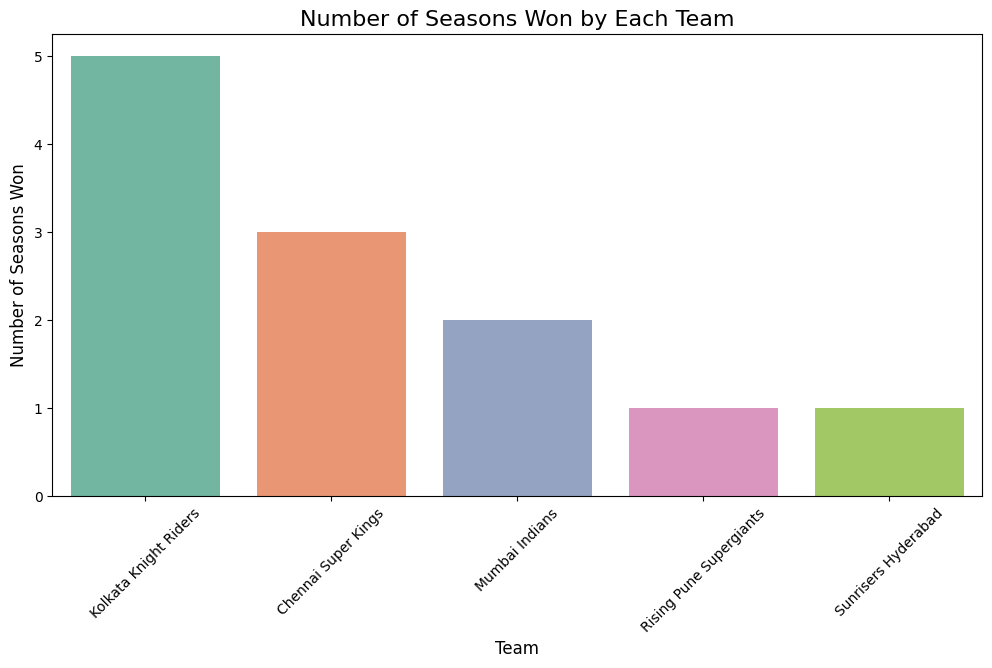

In [100]:
# Plot the number of seasons won by each team
plt.figure(figsize=(12, 6))
sns.barplot(x=seasons_won.index, y=seasons_won.values, palette='Set2')

# Add title and labels
plt.title('Number of Seasons Won by Each Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Seasons Won', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# The toss winner, toss decision, winner in final matches.

In [101]:
# Step 1: Sort the dataset by season and match id, and then drop duplicates to get the last match (final) of each season
finals = matches.sort_values(by=['season', 'id']).drop_duplicates('season', keep='last')

# Step 2: Extract the toss winner, toss decision, and winner for each final match
finals_toss_winner_decision = finals[['season', 'toss_winner', 'toss_decision', 'winner']]

# Display the results
print("Toss Winner, Toss Decision, and Winner in IPL Final Matches:")
print(finals_toss_winner_decision)


Toss Winner, Toss Decision, and Winner in IPL Final Matches:
     season                  toss_winner toss_decision                 winner
116    2008             Rajasthan Royals         field       Rajasthan Royals
173    2009  Royal Challengers Bangalore         field        Deccan Chargers
233    2010          Chennai Super Kings           bat    Chennai Super Kings
306    2011          Chennai Super Kings           bat    Chennai Super Kings
380    2012          Chennai Super Kings           bat  Kolkata Knight Riders
456    2013               Mumbai Indians           bat         Mumbai Indians
516    2014        Kolkata Knight Riders         field  Kolkata Knight Riders
575    2015          Chennai Super Kings         field         Mumbai Indians
635    2016          Sunrisers Hyderabad           bat    Sunrisers Hyderabad
58     2017               Mumbai Indians           bat         Mumbai Indians
695    2018          Chennai Super Kings         field    Chennai Super Kings
755

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\61980475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_decision', data=finals_toss_winner_decision, palette='Set2')


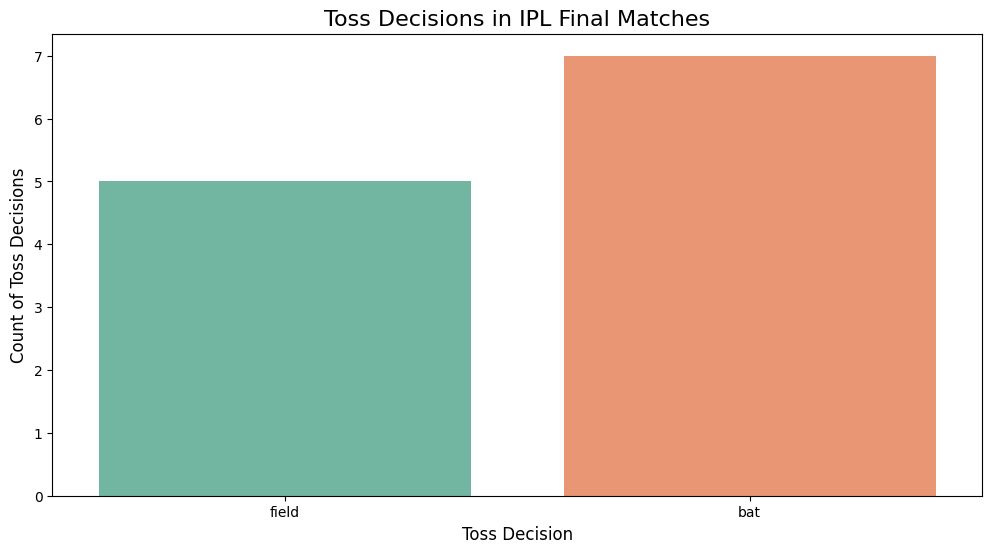

In [103]:
# Bar Plot for Toss Decisions
# Plot the toss decisions for each season in the final match
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_decision', data=finals_toss_winner_decision, palette='Set2')

# Add title and labels
plt.title('Toss Decisions in IPL Final Matches', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count of Toss Decisions', fontsize=12)

# Display the plot
plt.show()

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\366992910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_winner', data=finals_toss_winner_decision, palette='Set2')


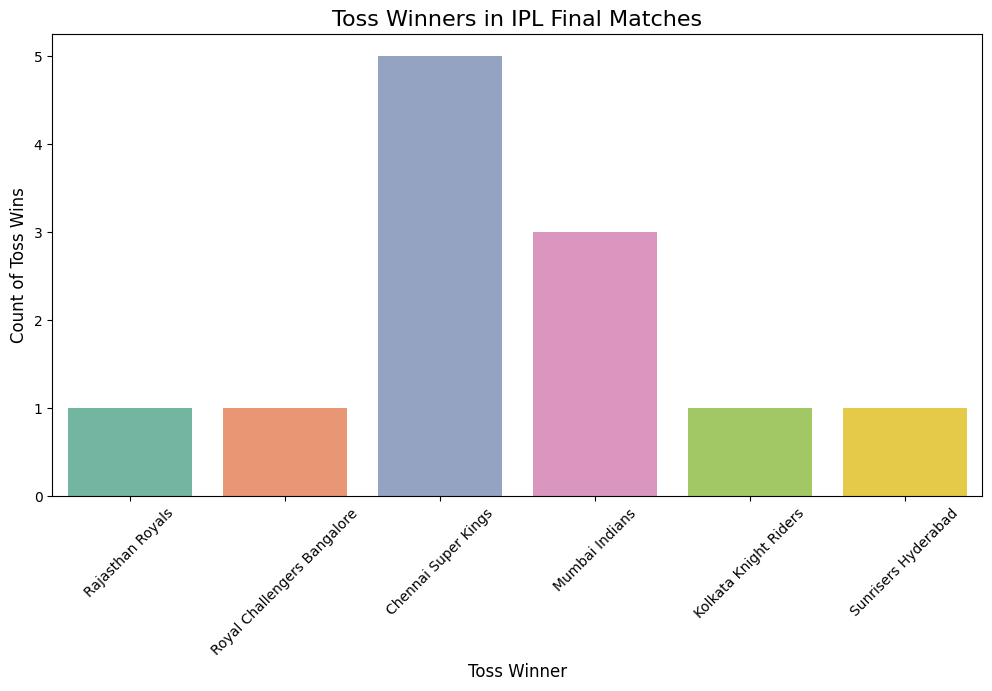

In [104]:
# Bar Plot for Toss Winners
# Plot the toss winners for each season in the final match
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_winner', data=finals_toss_winner_decision, palette='Set2')

# Add title and labels
plt.title('Toss Winners in IPL Final Matches', fontsize=16)
plt.xlabel('Toss Winner', fontsize=12)
plt.ylabel('Count of Toss Wins', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# The man of the match for each winning team

In [105]:
# Step 1: Group by winner to find the Man of the Match for each winning team
man_of_match_per_team = matches[matches['player_of_match'].notnull()].groupby('winner')['player_of_match'].first().reset_index()

# Display the results
print("Man of the Match for Each Winning Team:")
print(man_of_match_per_team)


Man of the Match for Each Winning Team:
                         winner player_of_match
0           Chennai Super Kings      MEK Hussey
1               Deccan Chargers    AC Gilchrist
2                Delhi Capitals         RR Pant
3              Delhi Daredevils       SV Samson
4                 Gujarat Lions          AJ Tye
5               Kings XI Punjab      GJ Maxwell
6          Kochi Tuskers Kerala     BB McCullum
7         Kolkata Knight Riders         CA Lynn
8                Mumbai Indians          N Rana
9                 Pune Warriors         SB Wagh
10             Rajasthan Royals       SR Watson
11       Rising Pune Supergiant       SPD Smith
12      Rising Pune Supergiants       AM Rahane
13  Royal Challengers Bangalore       KM Jadhav
14          Sunrisers Hyderabad    Yuvraj Singh


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3264762645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='winner', y='player_of_match', data=man_of_match_per_team, palette='Set2')


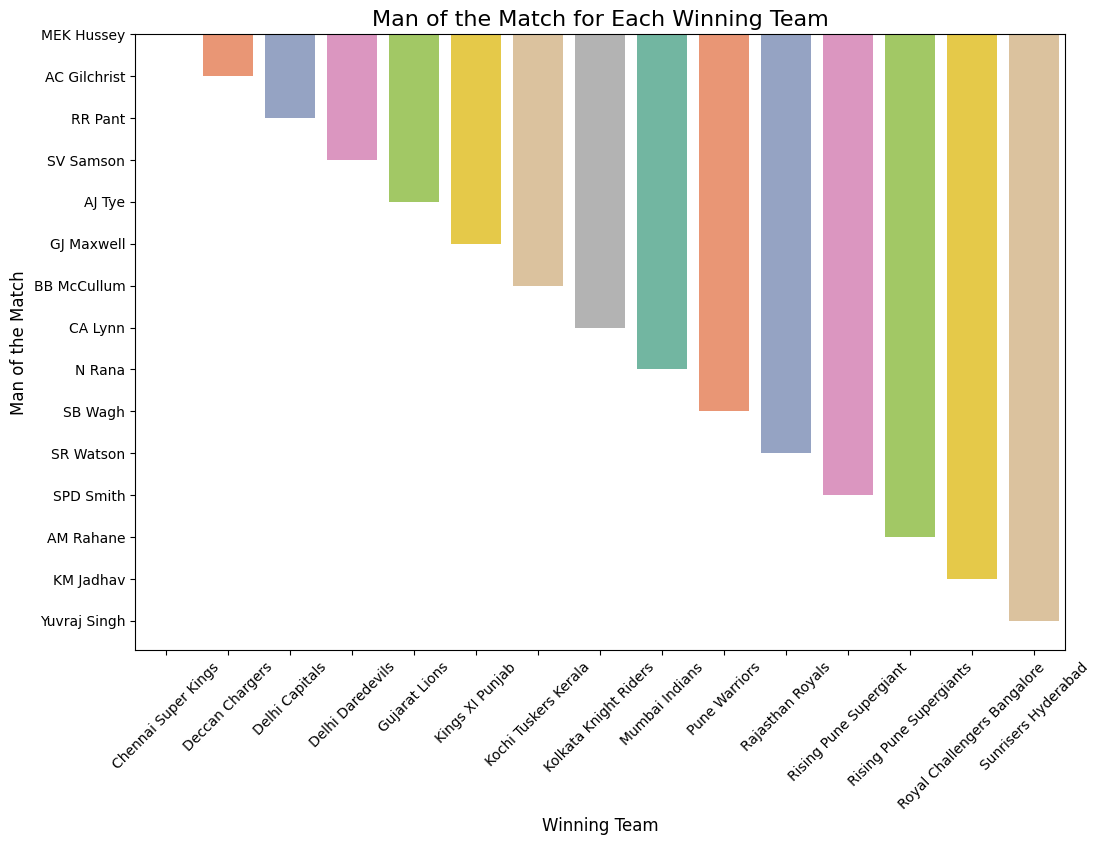

In [106]:
# Plot the Man of the Match for each winning team
plt.figure(figsize=(12, 8))
sns.barplot(x='winner', y='player_of_match', data=man_of_match_per_team, palette='Set2')
plt.title('Man of the Match for Each Winning Team', fontsize=16)
plt.xlabel('Winning Team', fontsize=12)
plt.ylabel('Man of the Match', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Decision in every toss either fielding or batting

In [109]:
# Count the occurrences of each toss decision (bat or field)
toss_decision_counts = matches['toss_decision'].value_counts()

# Display the counts of toss decisions
print("Toss Decisions in IPL Matches:")
toss_decision_counts




Toss Decisions in IPL Matches:


toss_decision
field    463
bat      293
Name: count, dtype: int64

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3425320288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='Set2')


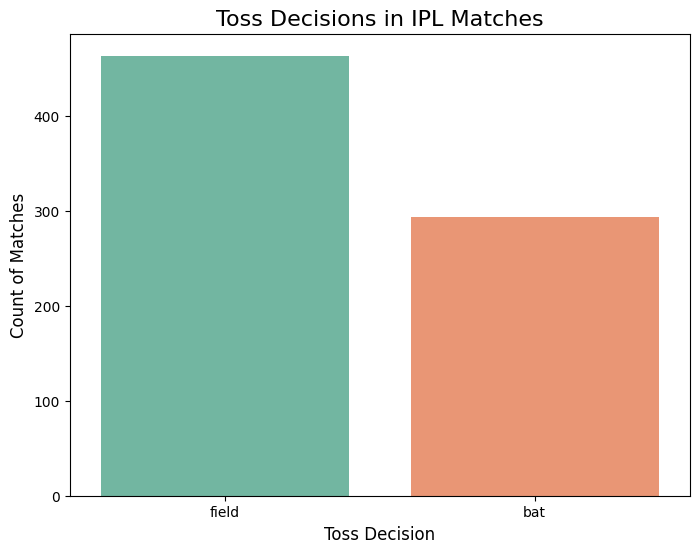

In [110]:
# Create a bar plot to visualize toss decisions
plt.figure(figsize=(8, 6))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='Set2')

# Add title and labels
plt.title('Toss Decisions in IPL Matches', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count of Matches', fontsize=12)

# Display the plot
plt.show()

# What is the probability of winning a match if the toss was won?

In [112]:
# Filter the matches where the toss was won
toss_won_matches = matches[matches['toss_winner'].notnull()]

# Identify the number of matches where the toss winner also won the match
toss_winner_wins = toss_won_matches[toss_won_matches['winner'] == toss_won_matches['toss_winner']]

# Calculate the probability
probability = len(toss_winner_wins) / len(toss_won_matches)

# Display the result
print(f"The probability of winning the match if the toss was won is: {probability:.4f}")


The probability of winning the match if the toss was won is: 0.5198


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\4090695329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Toss Winner Wins', 'Toss Winner Losses'], y=[len(toss_winner_wins), toss_winner_loss], palette='Set2')


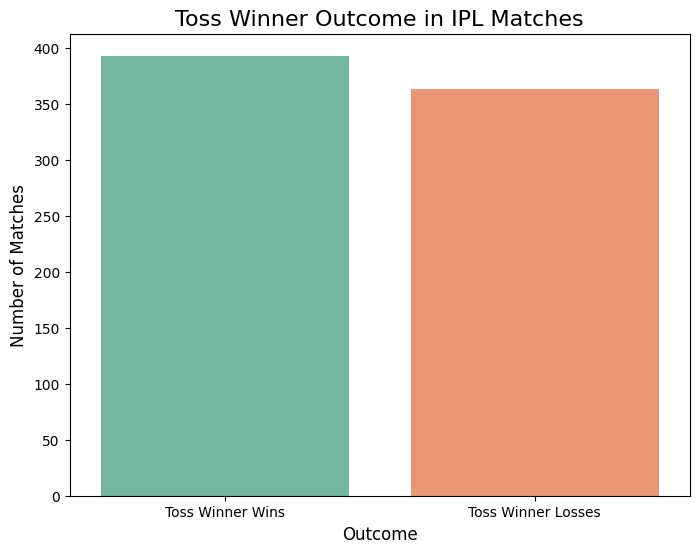

In [113]:
# Visualize the probability using a bar plot
toss_winner_loss = len(toss_won_matches) - len(toss_winner_wins)

# Create a bar plot to visualize the probability
plt.figure(figsize=(8, 6))
sns.barplot(x=['Toss Winner Wins', 'Toss Winner Losses'], y=[len(toss_winner_wins), toss_winner_loss], palette='Set2')

# Add title and labels
plt.title('Toss Winner Outcome in IPL Matches', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Display the plot
plt.show()


# The total runs by fours hit and the total number of fours hit by each team

In [114]:
# Filter for the deliveries where a four was hit
fours = deliveries[deliveries['batsman_runs'] == 4]

# Calculate total runs by fours (i.e., 4 runs each time a four is hit)
total_runs_from_fours = fours.groupby('batting_team')['batsman_runs'].sum().reset_index()

# Count the total number of fours hit by each team
total_fours_hit = fours.groupby('batting_team').size().reset_index(name='total_fours')

# Merge the two DataFrames to combine runs and fours
team_fours_stats = pd.merge(total_runs_from_fours, total_fours_hit, on='batting_team')

# Display the results
print("Total Runs from Fours and Total Fours Hit by Each Team:")
print(team_fours_stats)


Total Runs from Fours and Total Fours Hit by Each Team:
                   batting_team  batsman_runs  total_fours
0           Chennai Super Kings          8772         2193
1               Deccan Chargers          3828          957
2                Delhi Capitals           968          242
3              Delhi Daredevils          8632         2158
4                 Gujarat Lions          1840          460
5               Kings XI Punjab          9832         2458
6          Kochi Tuskers Kerala           680          170
7         Kolkata Knight Riders          9736         2434
8                Mumbai Indians         10352         2588
9                 Pune Warriors          2100          525
10             Rajasthan Royals          8140         2035
11       Rising Pune Supergiant           788          197
12      Rising Pune Supergiants           684          171
13  Royal Challengers Bangalore          9440         2360
14          Sunrisers Hyderabad          5776         1444


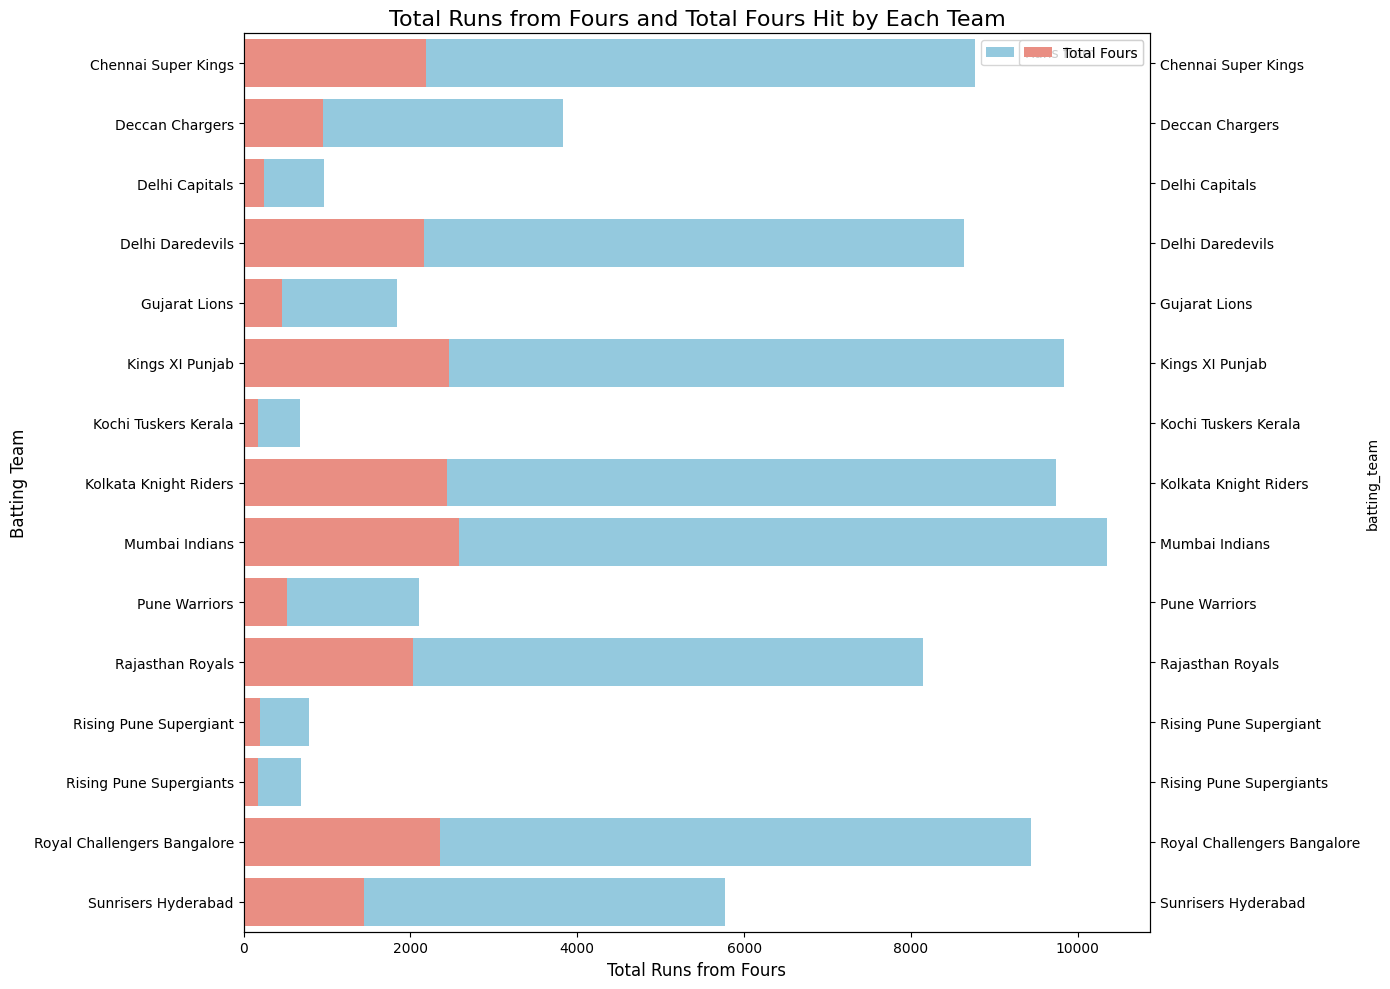

In [126]:
# Visualize the total runs from fours and total number of fours hit by each team
fig, ax1 = plt.subplots(figsize=(14, 10))

# Plotting total runs from fours
sns.barplot(y='batting_team', x='batsman_runs', data=team_fours_stats, ax=ax1, color='skyblue', label='Runs from Fours')

# Creating a second y-axis for total number of fours
ax2 = ax1.twinx()
sns.barplot(y='batting_team', x='total_fours', data=team_fours_stats, ax=ax2, color='salmon', label='Total Fours')

# Adding titles and labels
ax1.set_title('Total Runs from Fours and Total Fours Hit by Each Team', fontsize=16)
ax1.set_ylabel('Batting Team', fontsize=12)
ax1.set_xlabel('Total Runs from Fours', fontsize=12)
ax2.set_xlabel('Total Fours Hit', fontsize=12)

# Adjust spacing between labels and x-axis
plt.tight_layout()

# Show the plot
plt.show()


# The fours hit by players

In [127]:
# Filter for the deliveries where a four was hit
fours_by_player = deliveries[deliveries['batsman_runs'] == 4]

# Count the total number of fours hit by each player
fours_by_player_count = fours_by_player.groupby('batsman').size().reset_index(name='total_fours')

# Sort the data by the total number of fours in descending order
fours_by_player_count_sorted = fours_by_player_count.sort_values(by='total_fours', ascending=False)

# Display the results
print("Total Fours Hit by Each Player:")
print(fours_by_player_count_sorted)


Total Fours Hit by Each Player:
            batsman  total_fours
317        S Dhawan          526
343        SK Raina          495
120       G Gambhir          492
387         V Kohli          482
89        DA Warner          459
..              ...          ...
368  Sandeep Sharma            1
322          S Mavi            1
371   Shivam Sharma            1
254         NS Naik            1
150        J Theron            1

[410 rows x 2 columns]


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3719495173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fours', y='batsman', data=fours_by_player_count_sorted, palette='viridis')


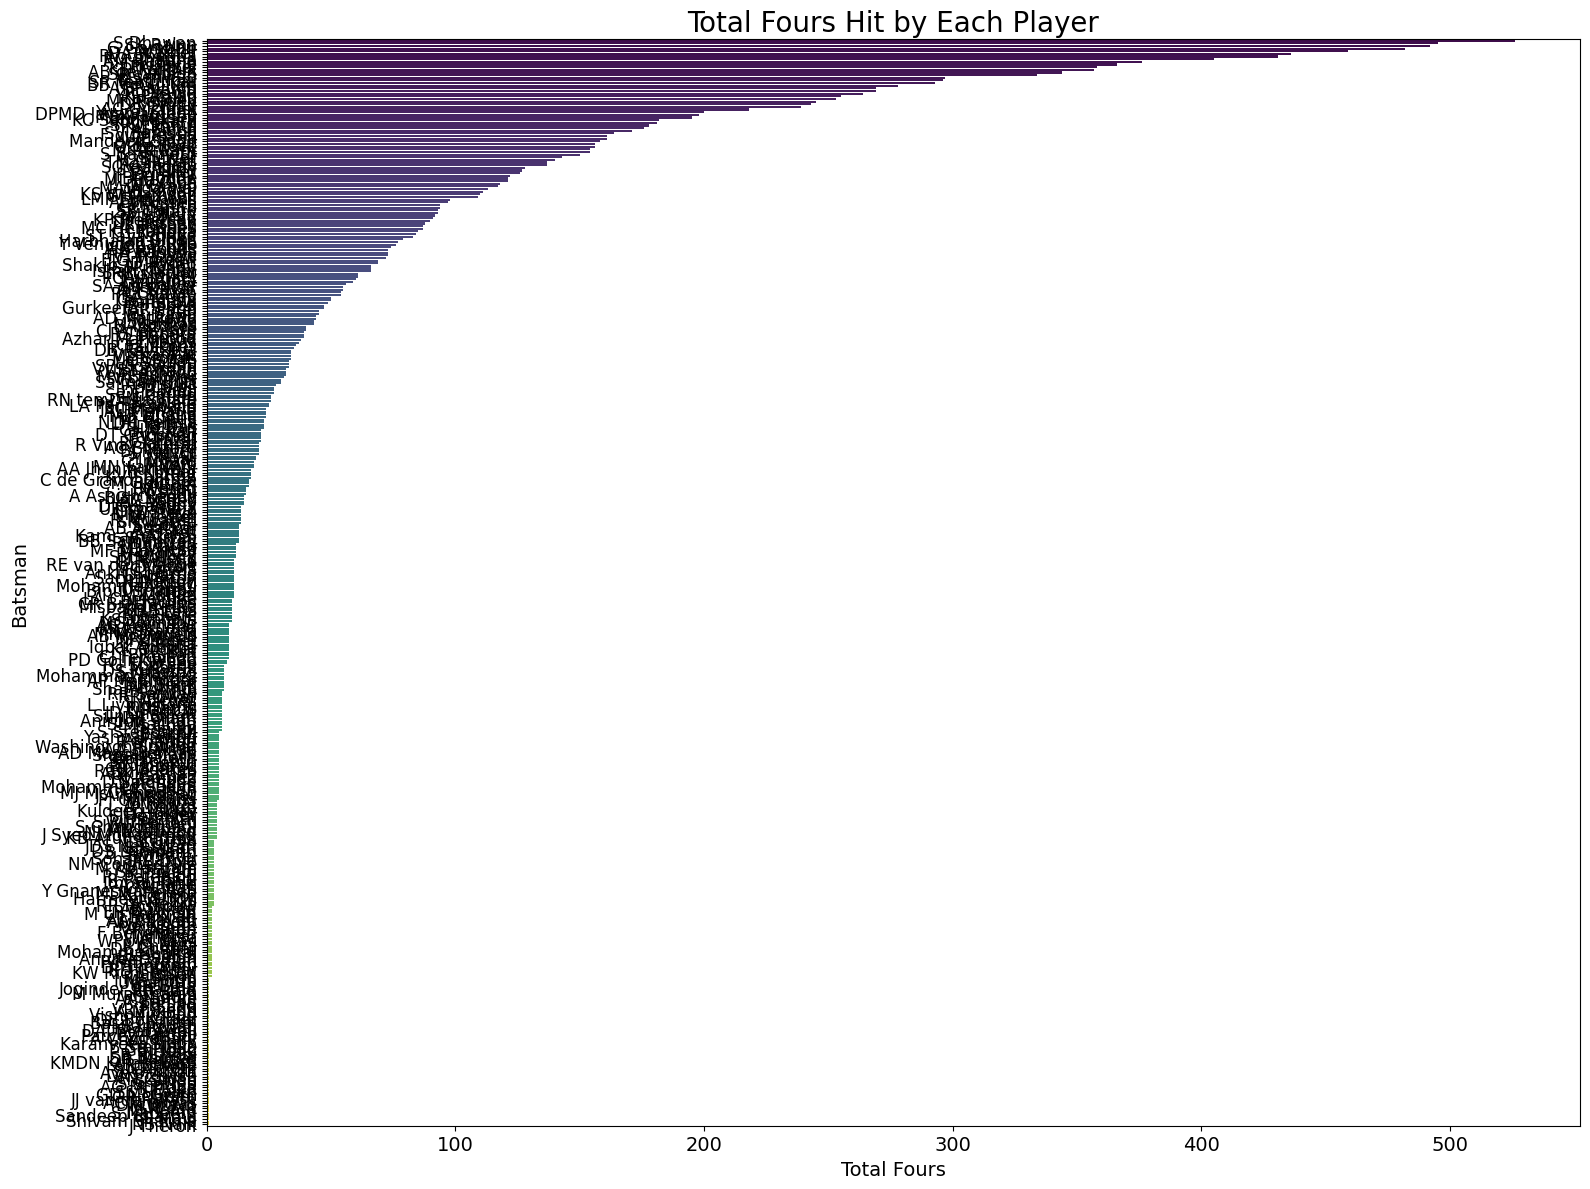

In [131]:
# Visualize the total fours hit by each player (horizontal bar plot for better readability)
plt.figure(figsize=(16, 12))  # Larger figure for better visibility

# Plotting the barplot horizontally
sns.barplot(x='total_fours', y='batsman', data=fours_by_player_count_sorted, palette='viridis')

# Adding title and labels with larger font sizes
plt.title('Total Fours Hit by Each Player', fontsize=20)
plt.xlabel('Total Fours', fontsize=14)
plt.ylabel('Batsman', fontsize=14)

# Rotate y-axis labels if necessary and increase font size
plt.xticks(fontsize=14)  # Increase font size for x-ticks
plt.yticks(fontsize=12)  # Increase font size for y-ticks

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3170064417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fours', y='batsman', data=top_10_players, palette='viridis')


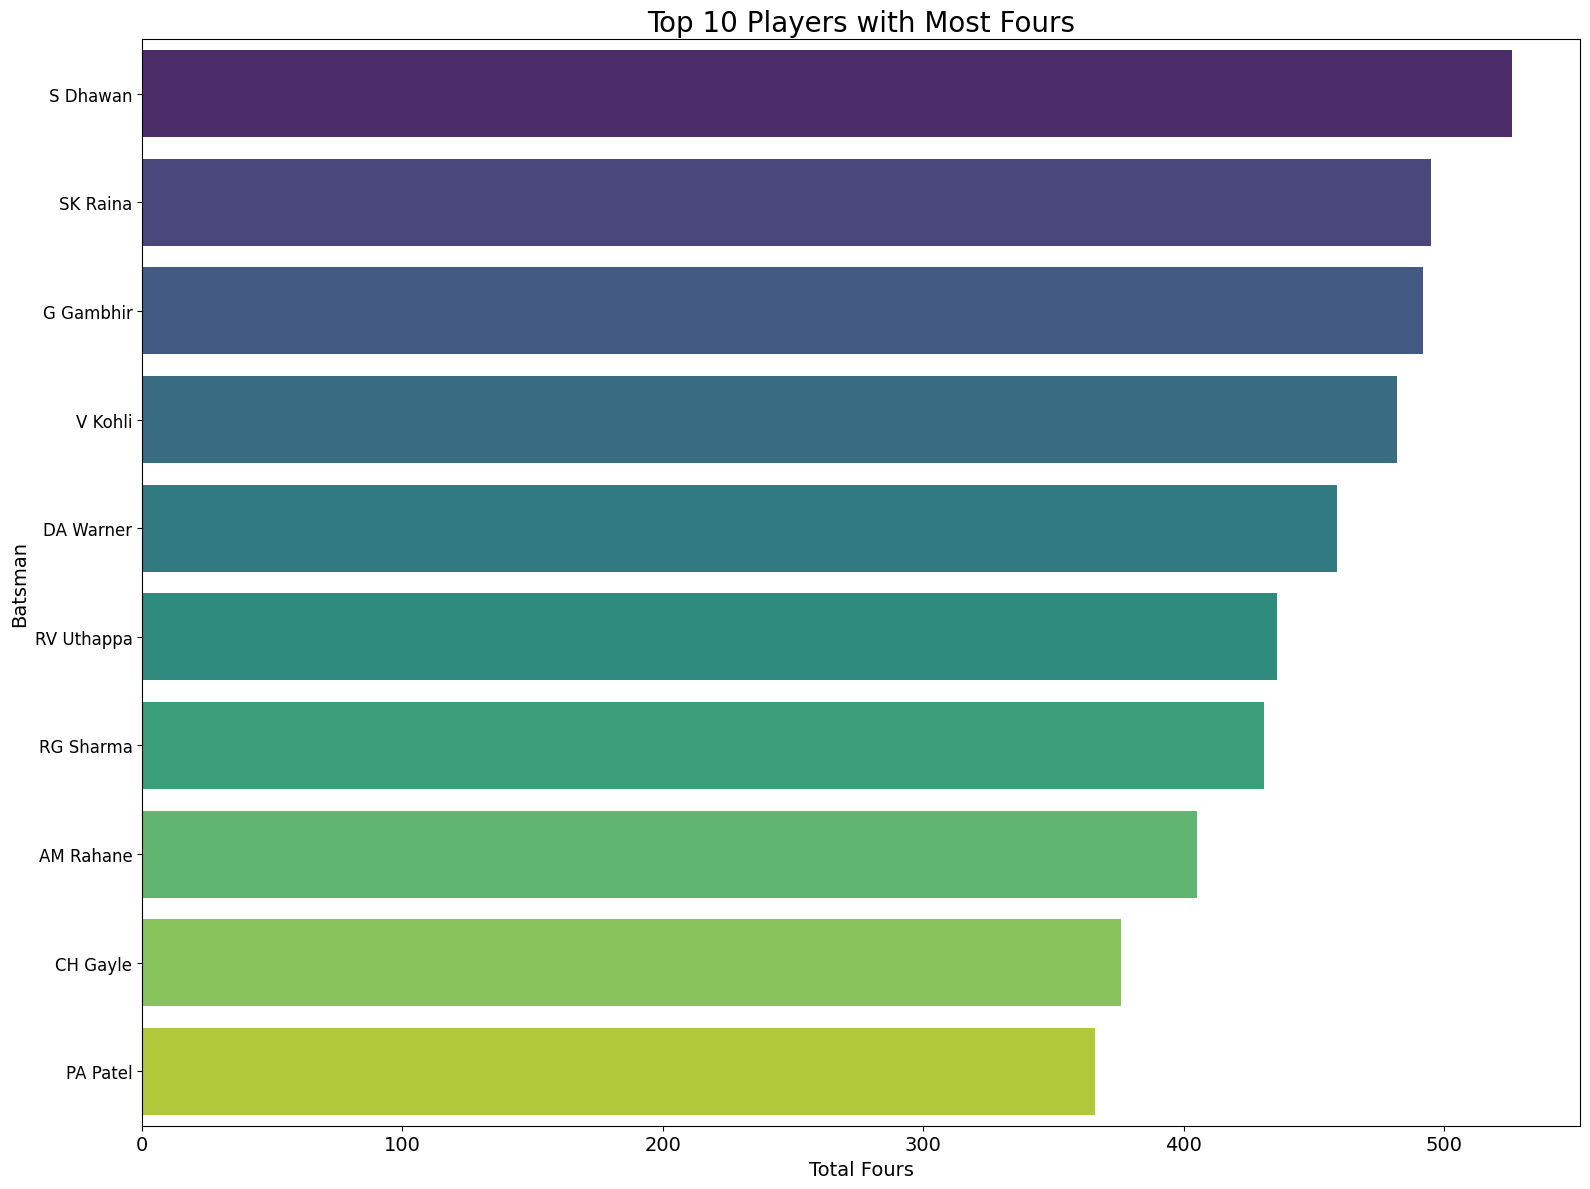

In [132]:
# Show only the top 10 players with the most fours
top_10_players = fours_by_player_count_sorted.head(10)

# Plot the top 10 players
plt.figure(figsize=(16, 12))  # Larger figure for better visibility
sns.barplot(x='total_fours', y='batsman', data=top_10_players, palette='viridis')

# Adding title and labels with larger font sizes
plt.title('Top 10 Players with Most Fours', fontsize=20)
plt.xlabel('Total Fours', fontsize=14)
plt.ylabel('Batsman', fontsize=14)

# Adjusting ticks and layout
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


# The number of fours hit in each season

In [147]:
# Filter deliveries for fours
fours = deliveries[deliveries['batsman_runs'] == 4]

# Merge deliveries with matches to get the season
fours_with_season = fours.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Group by season and count the sixes
fours_by_season = fours_with_season.groupby('season').size().reset_index(name='total_fours')

# Sort the data by season for better visualization
fours_by_season_sorted = fours_by_season.sort_values(by='season')

# Display the results
print("Number of Sixes Hit in Each IPL Season:")
fours_by_season_sorted



Number of Sixes Hit in Each IPL Season:


,season,total_fours
0,2008,1703
1,2009,1321
2,2010,1709
3,2011,1916
4,2012,1911
5,2013,2054
6,2014,1563
7,2015,1611
8,2016,1633
9,2017,1612


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\1305697784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_fours', data=fours_by_season_sorted, palette='viridis')


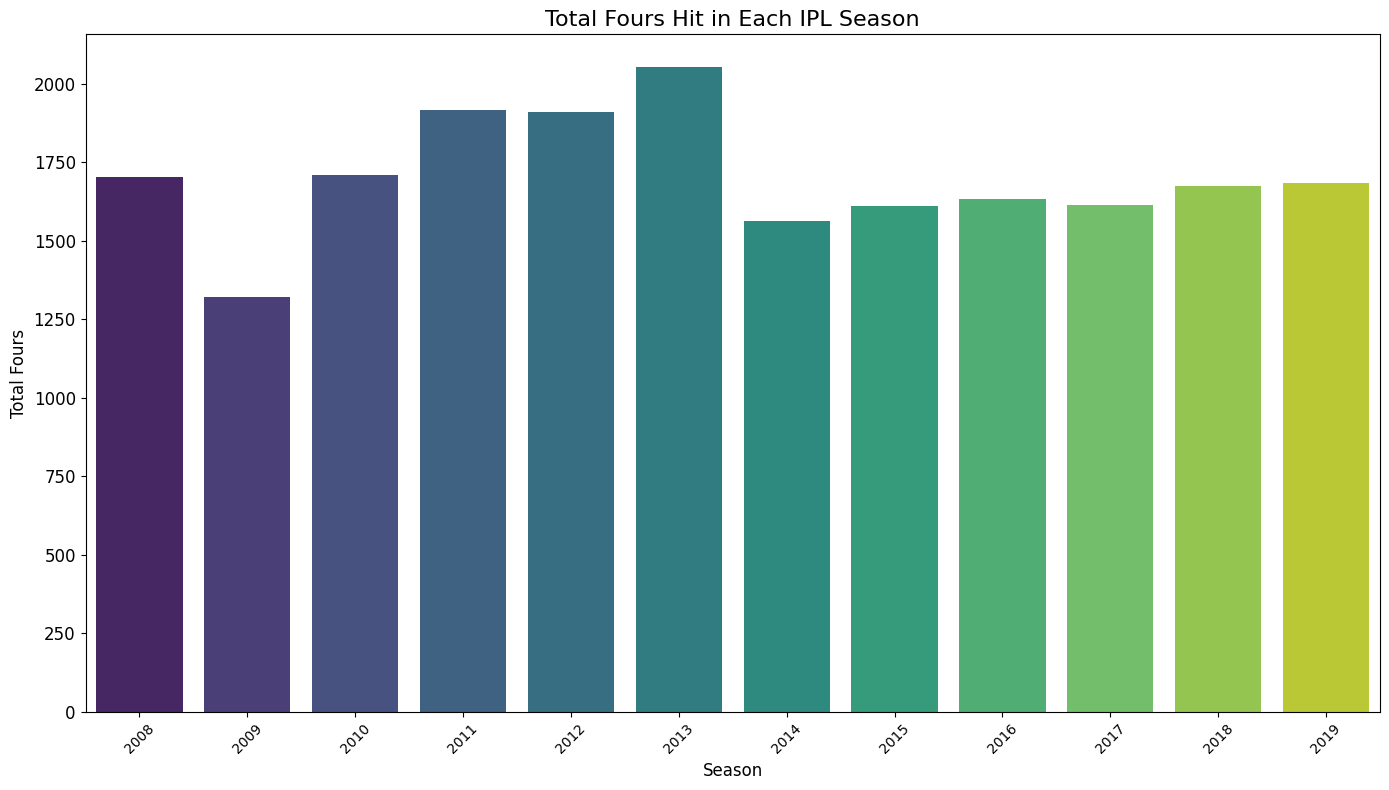

In [148]:
# Step 3: Visualize the total fours hit by season
plt.figure(figsize=(14, 8))  # Larger figure for better readability

# Plotting a barplot for the total number of fours hit in each season
sns.barplot(x='season', y='total_fours', data=fours_by_season_sorted, palette='viridis')

# Adding title and labels with larger font sizes
plt.title('Total Fours Hit in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Fours', fontsize=12)

# Adjusting tick labels and layout for better visibility
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


# The total runs by the sixes hit and the number of sixes hit by each team

In [154]:
# Filter for deliveries where a six was hit (batsman_runs == 6)
sixes_by_team = deliveries[deliveries['batsman_runs'] == 6]

# Group by batting_team and calculate the total number of sixes and total runs (6 runs per six)
sixes_by_team_count = sixes_by_team.groupby('batting_team').size().reset_index(name='total_sixes')
sixes_by_team_count['total_runs_from_sixes'] = sixes_by_team_count['total_sixes'] * 6

# Sort the data by the number of sixes in descending order for better readability
sixes_by_team_count_sorted = sixes_by_team_count.sort_values(by='total_sixes', ascending=False)

# Display the results
print("Total Sixes and Total Runs from Sixes Hit by Each Team:")
print(sixes_by_team_count_sorted)


Total Sixes and Total Runs from Sixes Hit by Each Team:
                   batting_team  total_sixes  total_runs_from_sixes
13  Royal Challengers Bangalore         1132                   6792
8                Mumbai Indians         1096                   6576
5               Kings XI Punjab          976                   5856
0           Chennai Super Kings          973                   5838
7         Kolkata Knight Riders          930                   5580
3              Delhi Daredevils          801                   4806
10             Rajasthan Royals          681                   4086
14          Sunrisers Hyderabad          533                   3198
1               Deccan Chargers          400                   2400
9                 Pune Warriors          196                   1176
4                 Gujarat Lions          155                    930
11       Rising Pune Supergiant           89                    534
2                Delhi Capitals           87                

<Figure size 1400x800 with 0 Axes>

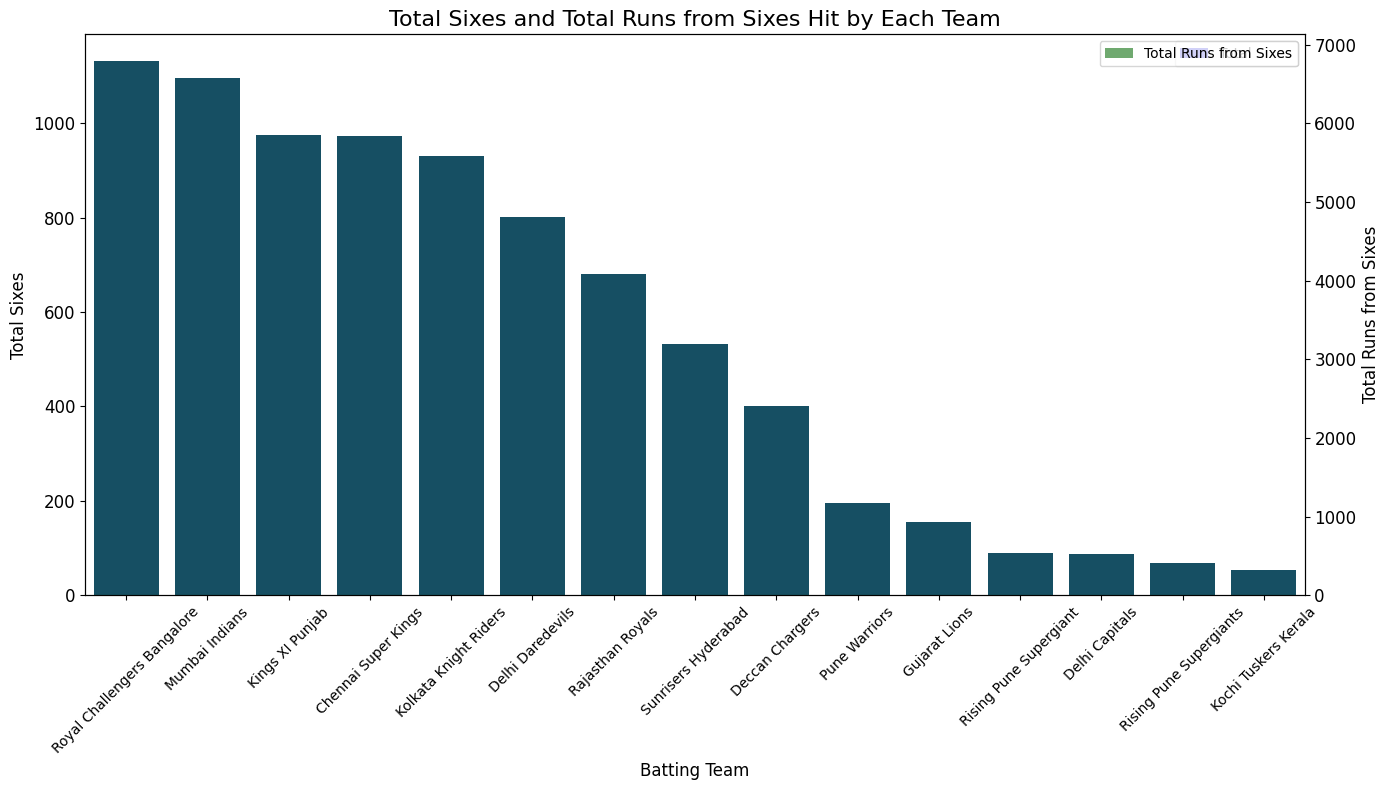

In [153]:
# Visualize the total number of sixes and total runs from sixes hit by each team
plt.figure(figsize=(14, 8))  # Larger figure for better readability

# Plotting two bar plots: one for the number of sixes and one for the total runs from sixes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for total sixes hit
sns.barplot(x='batting_team', y='total_sixes', data=sixes_by_team_count_sorted, ax=ax1, color='b', label='Total Sixes')
ax1.set_xlabel('Batting Team', fontsize=12)
ax1.set_ylabel('Total Sixes', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Creating a secondary y-axis to plot the total runs from sixes
ax2 = ax1.twinx()
sns.barplot(x='batting_team', y='total_runs_from_sixes', data=sixes_by_team_count_sorted, ax=ax2, color='g', alpha=0.6, label='Total Runs from Sixes')
ax2.set_ylabel('Total Runs from Sixes', fontsize=12)

# Adding titles and making the plot more readable
plt.title('Total Sixes and Total Runs from Sixes Hit by Each Team', fontsize=16)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


# The number of sixes hit in each season

In [152]:
# Filter deliveries for sixes
sixes = deliveries[deliveries['batsman_runs'] == 6]

# Merge deliveries with matches to get the season
sixes_with_season = sixes.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Group by season and count the sixes
sixes_by_season = sixes_with_season.groupby('season').size().reset_index(name='total_sixes')

# Sort the data by season for better visualization
sixes_by_season_sorted = sixes_by_season.sort_values(by='season')

# Display the results
print("Number of Sixes Hit in Each IPL Season:")
print(sixes_by_season_sorted)


Number of Sixes Hit in Each IPL Season:
    season  total_sixes
0     2008          623
1     2009          508
2     2010          587
3     2011          639
4     2012          733
5     2013          681
6     2014          715
7     2015          692
8     2016          639
9     2017          706
10    2018          869
11    2019          778


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\4077077317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_sixes', data=sixes_by_season_sorted, palette='coolwarm')


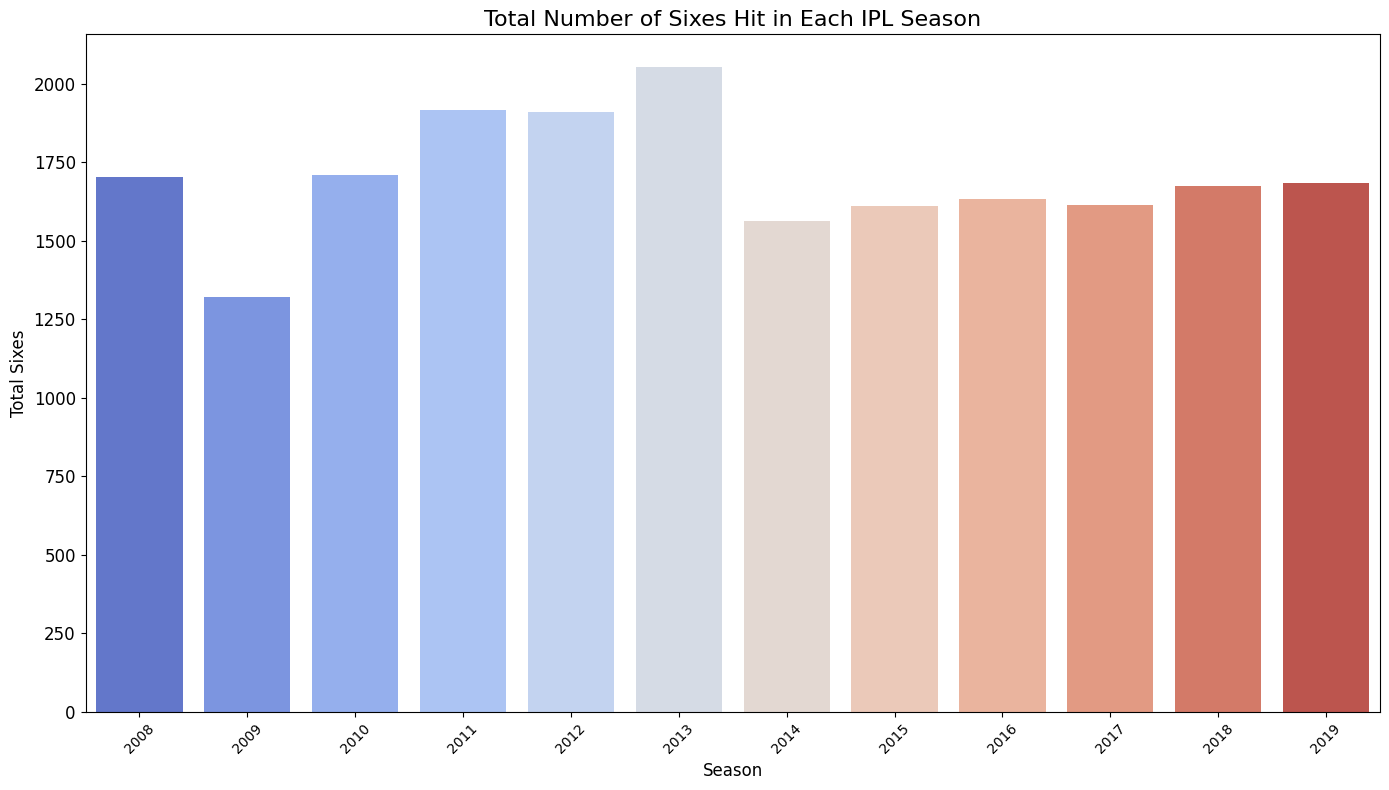

In [151]:
# Plot the total number of sixes hit in each season
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(x='season', y='total_sixes', data=sixes_by_season_sorted, palette='coolwarm')

# Adding title and labels
plt.title('Total Number of Sixes Hit in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Sixes', fontsize=12)

# Adjust x-axis for readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


# The top 10 leading run scorers in IPL

Top 10 Leading Run Scorers in IPL:
            batsman  batsman_runs
486         V Kohli          5434
428        SK Raina          5415
367       RG Sharma          4914
112       DA Warner          4741
392        S Dhawan          4632
92         CH Gayle          4560
290        MS Dhoni          4477
384      RV Uthappa          4446
26   AB de Villiers          4428
147       G Gambhir          4223


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\190482640.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman', y='batsman_runs', data=top_10_scorers, palette='viridis')


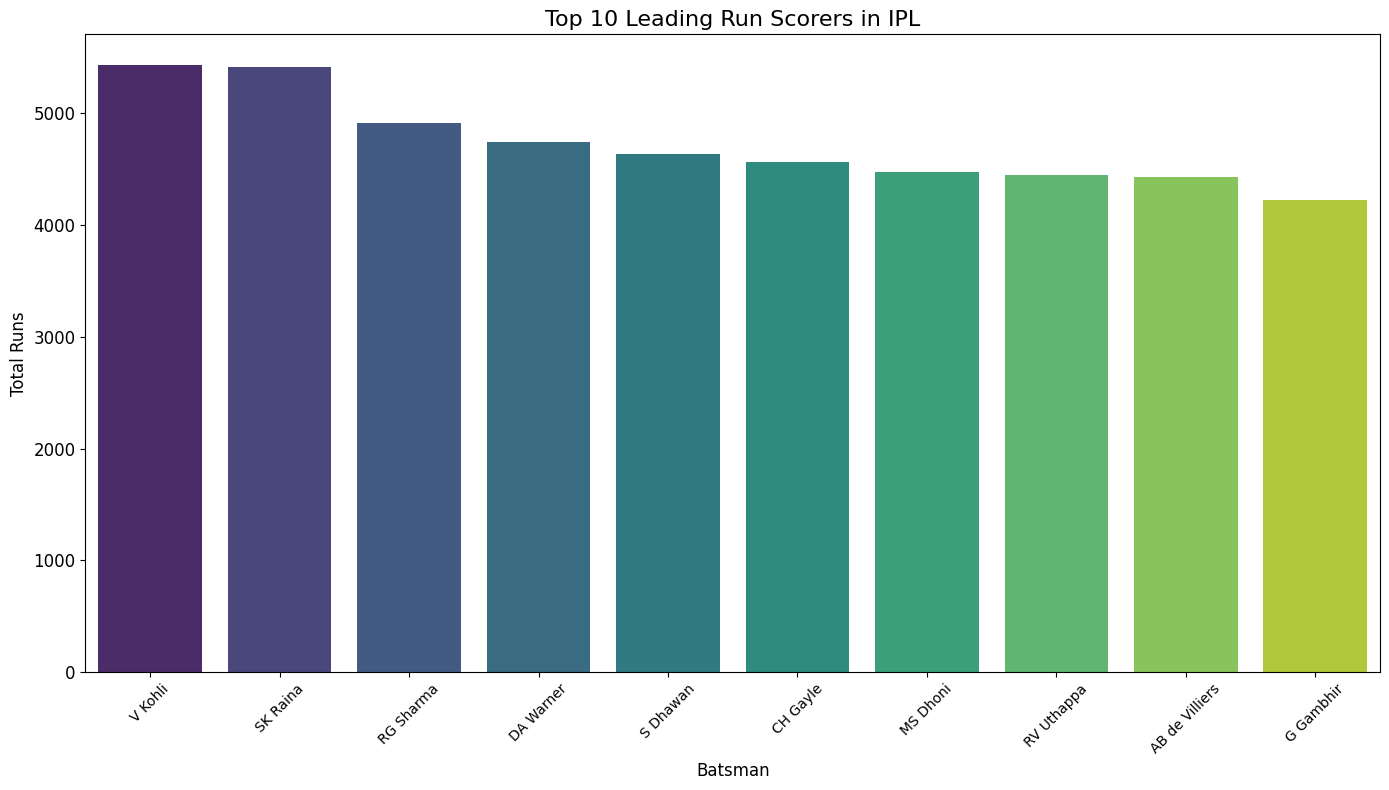

In [150]:
# Group by batsman and sum up the runs
leading_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()

# Sort the data by total runs in descending order
leading_scorers_sorted = leading_scorers.sort_values(by='batsman_runs', ascending=False)

# Select the top 10 run-scorers
top_10_scorers = leading_scorers_sorted.head(10)

# Display the top 10 leading run scorers
print("Top 10 Leading Run Scorers in IPL:")
print(top_10_scorers)

# Visualize the top 10 leading run scorers
plt.figure(figsize=(14, 8))
sns.barplot(x='batsman', y='batsman_runs', data=top_10_scorers, palette='viridis')

# Adding labels and title
plt.title('Top 10 Leading Run Scorers in IPL', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\2754427417.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wins', y='Team', data=team_wins, palette='viridis')


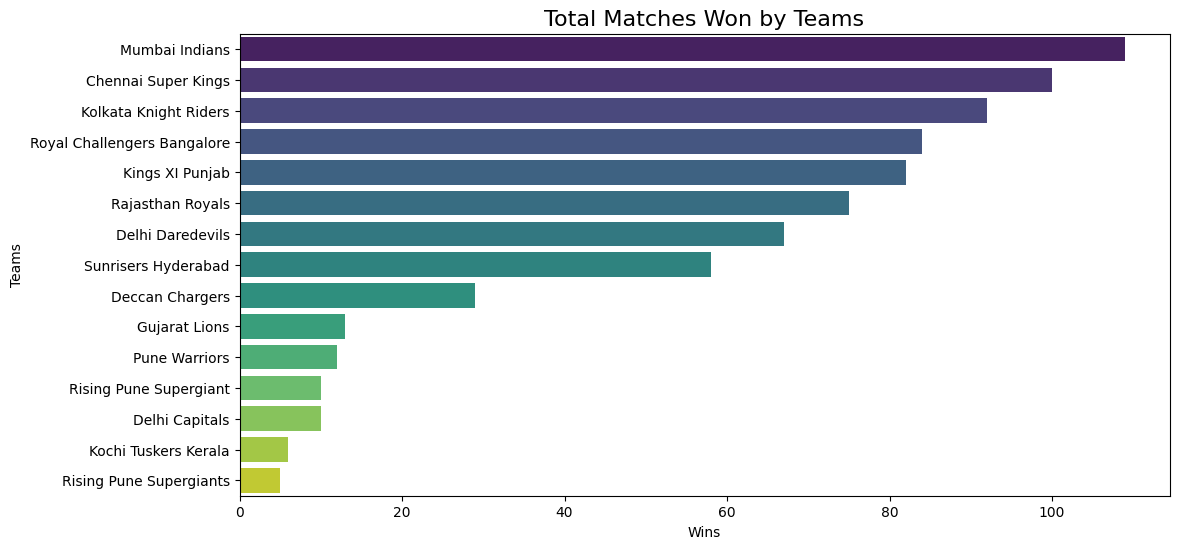

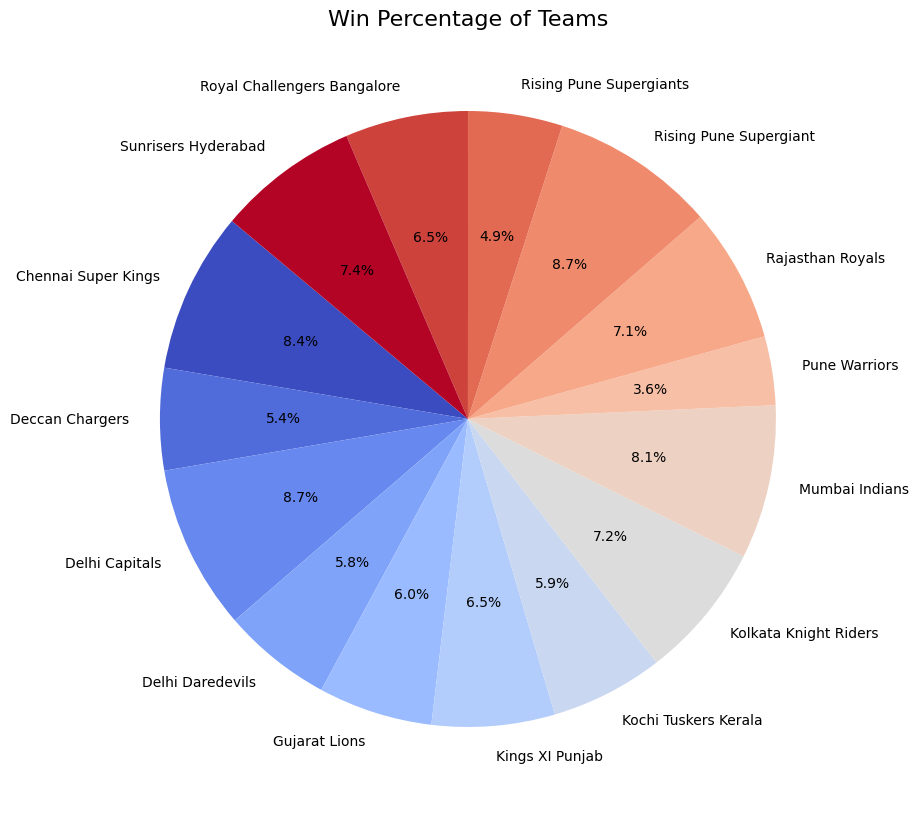

In [159]:
# Most Successful Teams
# Number of matches won by each team
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

# Bar chart for matches won
plt.figure(figsize=(12, 6))
sns.barplot(x='Wins', y='Team', data=team_wins, palette='viridis')
plt.title('Total Matches Won by Teams', fontsize=16)
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.show()

# Win percentage
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
win_percentage = (team_wins.set_index('Team')['Wins'] / matches_played) * 100

# Pie chart for win percentage
plt.figure(figsize=(10, 10))
win_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='coolwarm')
plt.title('Win Percentage of Teams', fontsize=16)
plt.ylabel('')
plt.show()


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3370948569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batsman', data=batsman_runs, palette='mako')


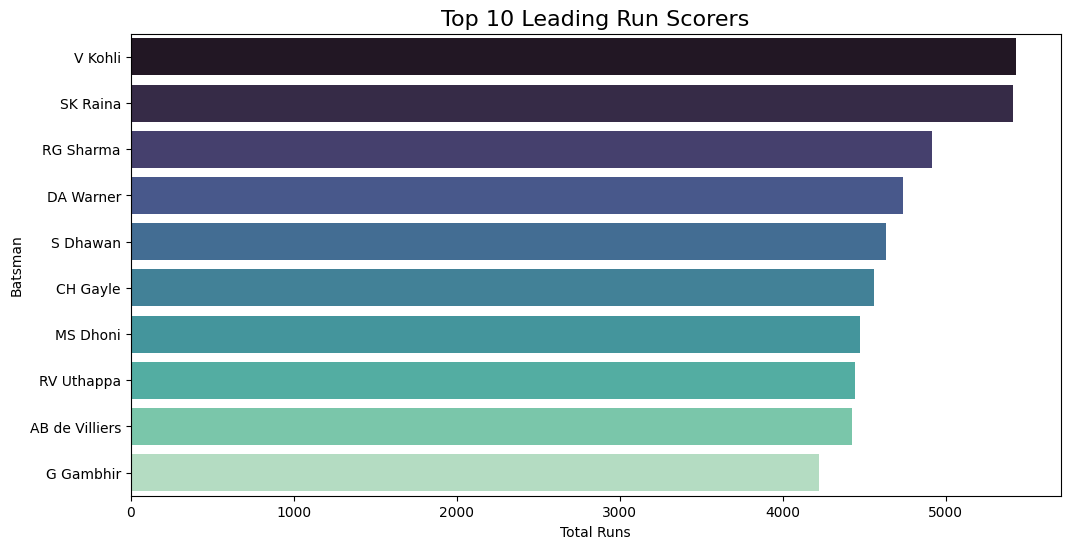

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3370948569.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=wickets, palette='rocket')


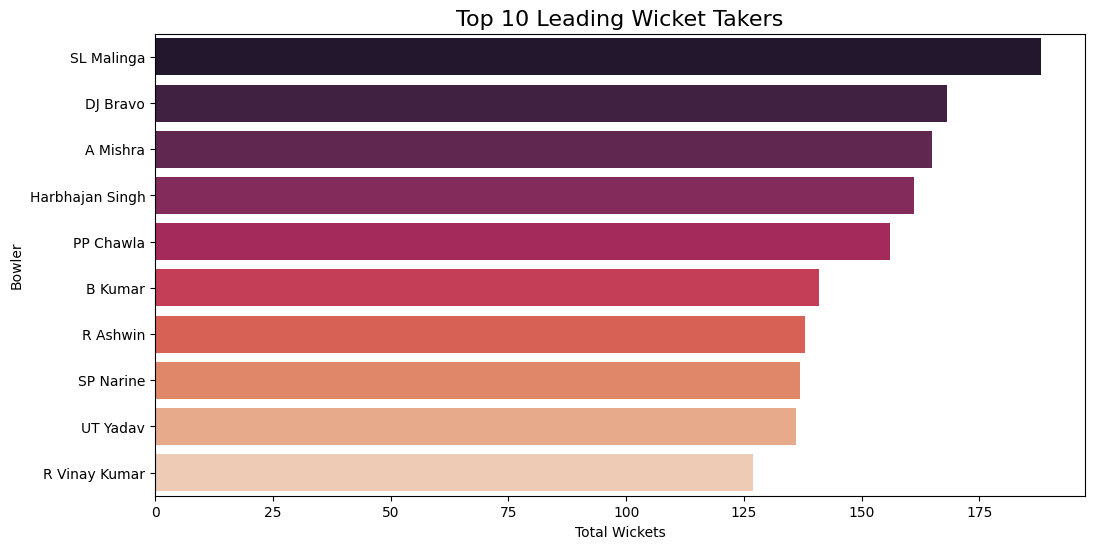

C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\3370948569.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mom_awards.values, y=mom_awards.index, palette='cool')


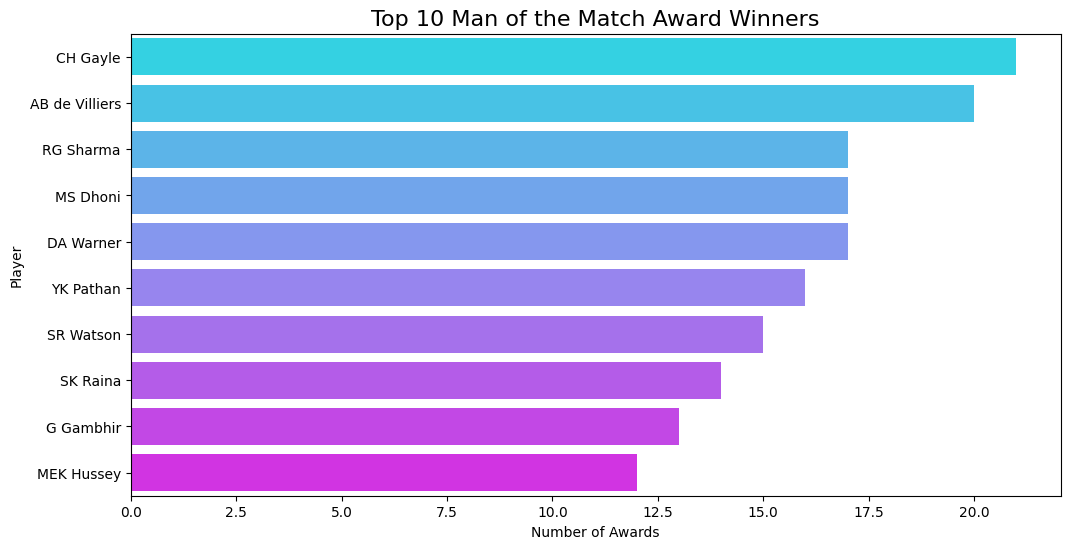

In [160]:
# Most Successful Players
# Leading run-scorers
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batsman', data=batsman_runs, palette='mako')
plt.title('Top 10 Leading Run Scorers', fontsize=16)
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

# Leading wicket-takers
wickets = deliveries[~deliveries['dismissal_kind'].isnull()].groupby('bowler').size().reset_index(name='wickets')
wickets = wickets.sort_values(by='wickets', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=wickets, palette='rocket')
plt.title('Top 10 Leading Wicket Takers', fontsize=16)
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

# Man of the Match
mom_awards = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=mom_awards.values, y=mom_awards.index, palette='cool')
plt.title('Top 10 Man of the Match Award Winners', fontsize=16)
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()


Toss Winner Wins: 51.98% of the matches


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\711131097.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Venue', x='Matches Played', data=venue_wins.head(10), palette='cubehelix')


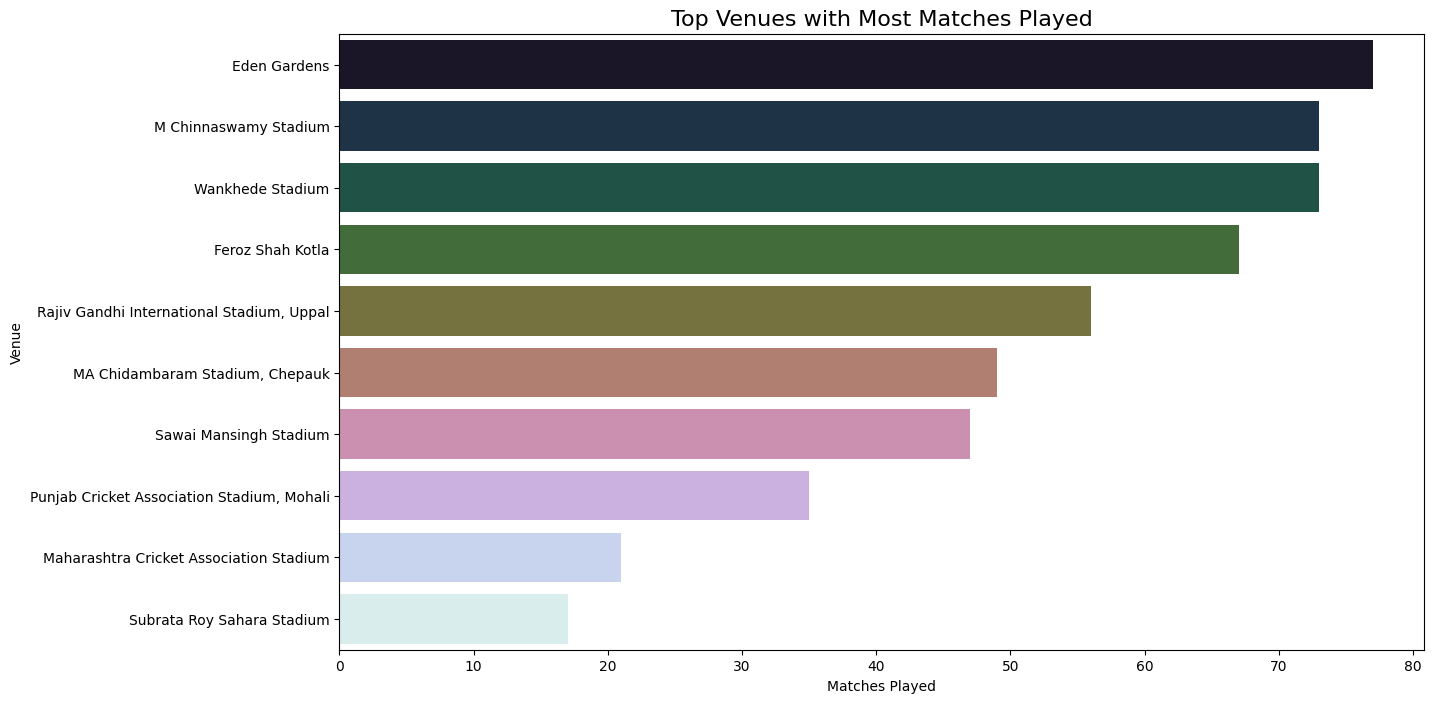

In [161]:
# Factors Contributing to Wins or Losses
# Toss impact
toss_impact = matches[matches['toss_winner'] == matches['winner']].shape[0] / matches.shape[0] * 100
print(f"Toss Winner Wins: {toss_impact:.2f}% of the matches")

# Wins by venue
venue_wins = matches['venue'].value_counts().reset_index()
venue_wins.columns = ['Venue', 'Matches Played']

plt.figure(figsize=(14, 8))
sns.barplot(y='Venue', x='Matches Played', data=venue_wins.head(10), palette='cubehelix')
plt.title('Top Venues with Most Matches Played', fontsize=16)
plt.xlabel('Matches Played')
plt.ylabel('Venue')
plt.show()


Top 10 Leading Run Scorers in IPL:
            batsman  batsman_runs
486         V Kohli          5434
428        SK Raina          5415
367       RG Sharma          4914
112       DA Warner          4741
392        S Dhawan          4632
92         CH Gayle          4560
290        MS Dhoni          4477
384      RV Uthappa          4446
26   AB de Villiers          4428
147       G Gambhir          4223


C:\Users\Dream Unlimited\AppData\Local\Temp\ipykernel_12932\1044273218.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman', y='batsman_runs', data=top_10_scorers, palette='viridis')


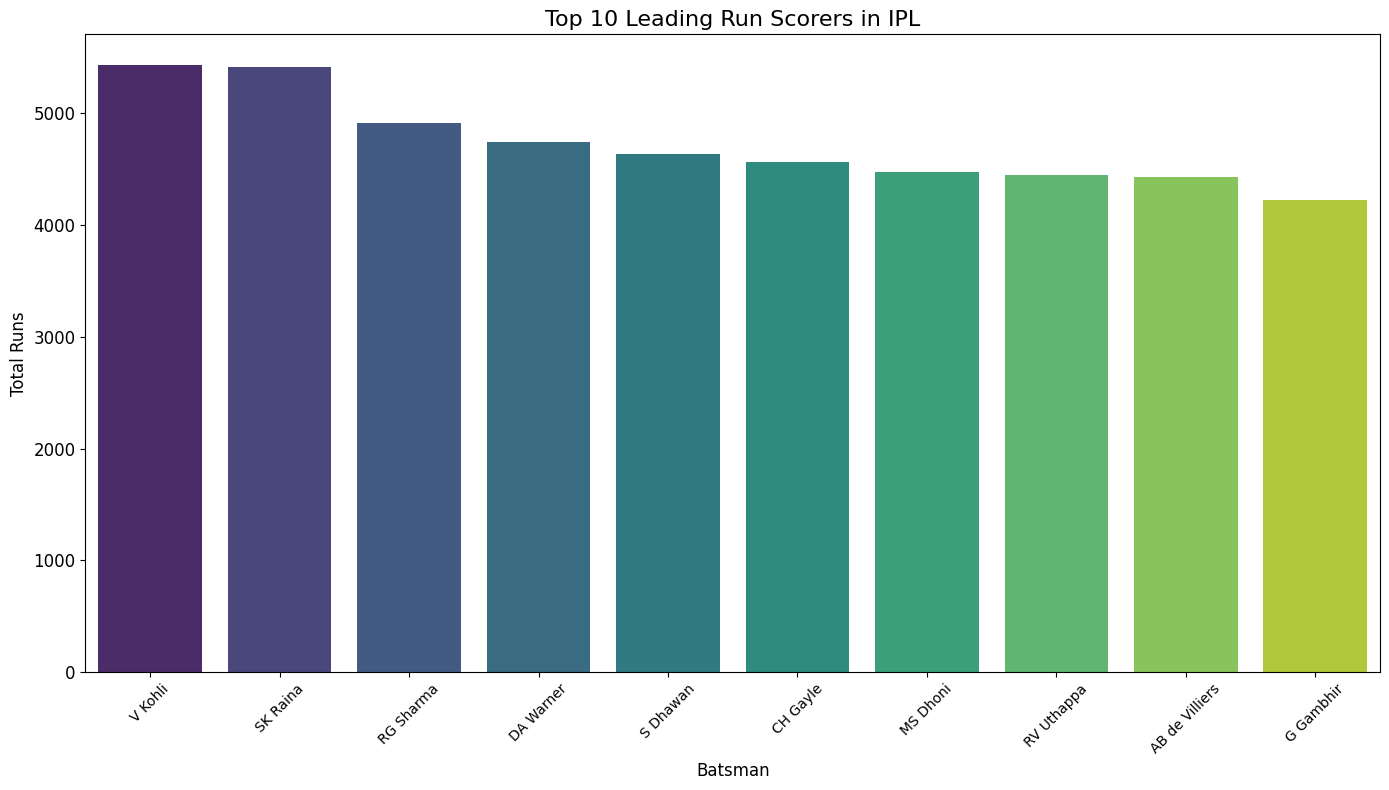


Conclusion:
The leading run-scorer in IPL history is V Kohli with 5434 runs.
These top players have consistently performed across seasons and are key contributors to their respective teams' successes.


In [162]:
# Group by batsman and sum up the runs
leading_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()

# Sort the data by total runs in descending order
leading_scorers_sorted = leading_scorers.sort_values(by='batsman_runs', ascending=False)

# Select the top 10 run-scorers
top_10_scorers = leading_scorers_sorted.head(10)

# Display the top 10 leading run scorers
print("Top 10 Leading Run Scorers in IPL:")
print(top_10_scorers)

# Visualize the top 10 leading run scorers
plt.figure(figsize=(14, 8))
sns.barplot(x='batsman', y='batsman_runs', data=top_10_scorers, palette='viridis')

# Adding labels and title
plt.title('Top 10 Leading Run Scorers in IPL', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Step 5: Conclusion
top_batsman = top_10_scorers.iloc[0]
print(f"\nConclusion:")
print(f"The leading run-scorer in IPL history is {top_batsman['batsman']} with {top_batsman['batsman_runs']} runs.")
print(f"These top players have consistently performed across seasons and are key contributors to their respective teams' successes.")


This analysis provides a comprehensive overview of IPL's most successful teams, players, and contributing factors for wins. The insights can help companies make informed decisions about endorsing high-performing teams and players, ensuring alignment with brand visibility and audience engagement.